In [2]:
# Importing Library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
%matplotlib inline 
lr = LogisticRegression()

In [3]:
# Accuracy Calculation
def lm(model,x,y):
    yh = model.predict(x)
    r2 = model.score(x,y)
    print('The Accuracy is: ', r2)
    cm = metrics.confusion_matrix(y, yh)
    print(cm)
    return(yh)

In [4]:
# Plot Fitted vs Actual Value
def plot(y,yhat):
    cm = metrics.confusion_matrix(y, yhat)
    plt.figure(figsize=(18, 10))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');

In [5]:
# Summary of the Model
def lm_view(x,y):
    X1 = sm.add_constant(x)
    model = sm.OLS(y,X1)
    model1 = model.fit()
    print(model1.summary())

In [6]:
# Split into dependent and Independent 
def IDsplit(data):
    I = data.iloc[:,:-1]
    D = data.iloc[:,-1]
    return(I,D)

In [7]:
# Complete Regression View, Accuracy, Plot
def complete_regression(train, test):
    a = IDsplit(train)
    X = a[0]
    Y = a[1]
    
    b = IDsplit(test)
    x = b[0]
    y = b[1]
    
    lr.fit(X,Y)
    print("\n")
    yh = lm(lr,x,y)
    plot(y,yh)

In [8]:
# Subset the Y Axis(coloumn) in with upper limit and lower
def subset(data,column, upper, lower):
    a = data[data[column]>lower]
    a = a[a[4096]<upper]
    return(a)

In [28]:
# Importing Data
ntrain = pd.read_csv (r'normal_train.csv', header=None )
ntest = pd.read_csv (r'normal_test.csv', header=None )
ptrain = pd.read_csv (r'pneumonia_train.csv', header=None )
ptest = pd.read_csv (r'pneumonia_test.csv', header=None )

In [29]:
print(ntrain.shape)
print(ntest.shape)
print(ptrain.shape)
print(ptest.shape)

(1341, 4096)
(234, 4096)
(3875, 4096)
(390, 4096)


In [30]:
ntrain[4096] = 0
ntest[4096] = 0
ptrain[4096] = 1
ptest[4096] = 1

In [31]:
train = ntrain.append(ptrain, ignore_index=True)
test = ntest.append(ptest, ignore_index=True)

In [32]:
print(train.shape)
print(test.shape)

(5216, 4097)
(624, 4097)


In [33]:
train

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
0,30,28,27,29,28,29,31,28,29,28,...,0,0,0,0,0,0,0,0,0,0
1,58,48,80,88,104,108,121,115,118,97,...,153,152,137,124,148,73,32,0,0,0
2,52,72,91,101,159,146,142,200,106,105,...,182,157,179,175,70,0,0,0,0,0
3,2,29,44,55,70,78,81,101,136,135,...,108,32,0,0,0,0,0,0,0,0
4,120,124,132,176,169,166,173,169,135,140,...,179,172,152,180,118,64,36,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5211,0,7,12,17,255,22,27,28,34,41,...,4,6,8,9,10,12,15,21,31,1
5212,40,49,54,60,65,68,69,70,67,72,...,174,183,134,52,12,23,25,35,23,1
5213,10,11,15,17,19,27,27,69,68,67,...,148,110,76,104,34,9,4,0,0,1
5214,40,40,43,46,48,49,43,48,49,43,...,21,26,27,27,27,28,30,30,39,1


In [34]:
X = train.drop([4096], axis=1)
Y = train[4096].values.reshape(-1,1)
x = test.drop([4096], axis=1)
y = test[4096].values.reshape(-1,1)

/Users/jayprajapati/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)




The Accuracy is:  0.7467948717948718
[[ 81 153]
 [  5 385]]


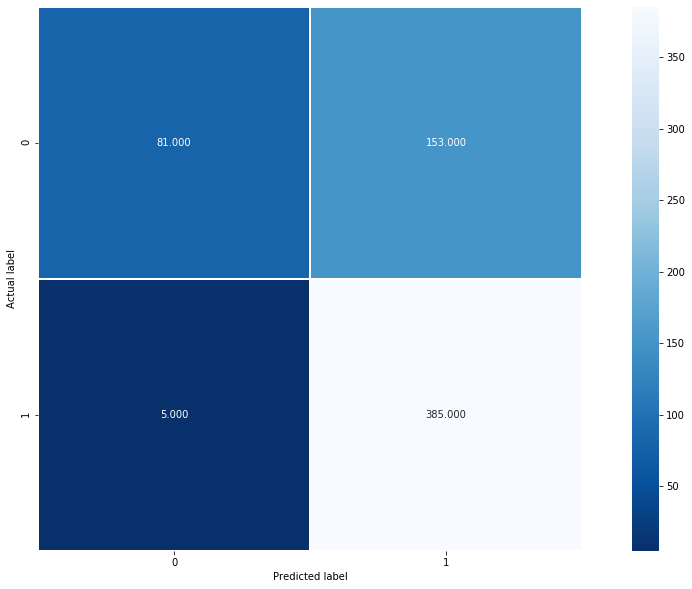

In [35]:
complete_regression(train, test)

In [38]:
lr.fit(X,Y)

/Users/jayprajapati/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jayprajapati/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
# Returning Coeffecient and Intercept 
def lm_inco(data):
    b = IDsplit(data)
    x = b[0]
    y = b[1]
    lr.fit(x,y)
    it = lr.intercept_
    co = lr.coef_
    inco = np.append(it,co) 
    return(inco)

In [41]:
model = lm_inco(train)

/Users/jayprajapati/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [42]:
model.shape

(4097,)

In [43]:
np.savetxt("Model.csv", model, delimiter=",")

In [34]:
# Y-value prediction
def predict(Data,coef):
    length = Data.shape[0]
    XM = np.column_stack((np.ones((length,1)), Data))
    pred = np.dot(XM,coef) 
    return(pred)

In [56]:
def predict(Data,coef):
    length = Data.shape[0]
    XM = np.append(1,Data)
    pred = np.dot(XM,coef)
    if pred>=0.5:
        a = 1;
    else:
        a = 0;
    return(a)

In [57]:
import os
from PIL import Image
d = "/Users/jayprajapati/Downloads/SEM - 4/SM/PROJECT/untitled folder/"
a = os.listdir(d)
for i in range(0,len(a)):
    im = Image.open(d+a[1]).convert('L')
    im2 = im.resize((64, 64))
    value = np.asarray(im2.getdata(),dtype=np.float64)
    value = pd.Series(value)

In [58]:
predict(value,model)

1

In [49]:
model.shape

(4097,)

In [54]:
length = value.shape[0]
XM = np.append(1,value)
XM

array([[ 1., 36.],
       [ 1., 35.],
       [ 1., 34.],
       ...,
       [ 1., 31.],
       [ 1., 34.],
       [ 1., 34.]])

In [55]:
np.append(1,value)

array([ 1., 36., 35., ..., 31., 34., 34.])